# Đồ án Thực Hành Lập Trình Khoa Học Dữ Liệu

In [1]:
import sys
sys.executable

'/home/echkidieu/miniconda3/envs/min_ds-env/bin/python'

<h1 style="color:orange">Import thư viện</h1>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
import re

---

<h1 style="color:orange">Thu thập dữ liệu</h1>

- Nhóm sử dụng dữ liệu "steam_games.csv" được thu thập sẵn ở trên kaggle. Dữ liệu này là về các game hiện có ở trên steam. Nguồn của dữ liệu được lấy tại: https://www.kaggle.com/datasets/tristan581/all-55000-games-on-steam-november-2022
- LICENSE của dữ liệu là [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/), người dùng được phép sử dụng với mục đích phi thương mại và phải credit cho chủ sở hữu
- Người ta đã thu thập dữ liệu này bằng cách sử dụng API của steam store và API của web thứ ba (steamspy.com)

---

<h1 style="color:orange">Khám phá dữ liệu</h1>

## Đọc dữ liệu vào dataframe

In [3]:
steam_df = pd.read_csv('steam_games.csv', sep = ';')
steam_df.head()

/home/echkidieu/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3139: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,App ID,Name,Short Description,Developer,Publisher,Genre,Tags,Type,Categories,Owners,...,Price,Initial Price,Discount,CCU,Languages,Platforms,Release Date,Required Age,Website,Header Image
0,10,Counter-Strike,Play the world's number 1 online action game. ...,Valve,Valve,Action,"Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...",game,"Multi-player, Valve Anti-Cheat enabled, Online...","10,000,000 .. 20,000,000",...,999,999,0,13990,"English, French, German, Italian, Spanish - Sp...","windows, mac, linux",2000/11/1,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
1,1000000,ASCENXION,ASCENXION is a 2D shoot 'em up game where you ...,IndigoBlue Game Studio,PsychoFlux Entertainment,"Action, Adventure, Indie","""Shoot Em Up"": 186, Metroidvania: 181, Bullet ...",game,"Single-player, Partial Controller Support, Ste...","0 .. 20,000",...,999,999,0,0,"English, Korean, Simplified Chinese",windows,2021/05/14,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
2,1000010,Crown Trick,"Enter a labyrinth that moves as you move, wher...",NEXT Studios,"Team17, NEXT Studios","Adventure, Indie, RPG, Strategy","Rogue-like: 268, Turn-Based Combat: 254, RPG: ...",game,"Single-player, Partial Controller Support, Ste...","200,000 .. 500,000",...,599,1999,70,99,"Simplified Chinese, English, Japanese, Traditi...",windows,2020/10/16,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
3,1000030,"Cook, Serve, Delicious! 3?!","Cook, serve and manage your food truck as you ...",Vertigo Gaming Inc.,Vertigo Gaming Inc.,"Action, Indie, Simulation, Strategy","Typing: 221, Management: 213, Casual: 209, Dif...",game,"Multi-player, Single-player, Co-op, Steam Achi...","100,000 .. 200,000",...,1999,1999,0,76,English,"windows, mac",2020/10/14,0,http://www.cookservedelicious.com,https://cdn.akamai.steamstatic.com/steam/apps/...
4,1000040,细胞战争,这是一款打击感十足的细胞主题游戏！操作简单但活下去却不简单，“你”作为侵入人体的细菌病毒，通...,DoubleC Games,DoubleC Games,"Action, Casual, Indie, Simulation","Action: 22, Casual: 22, Indie: 21, Simulation: 20",game,Single-player,"0 .. 20,000",...,199,199,0,0,Simplified Chinese,windows,2019/03/30,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...


## Dữ liệu có bao nhiêu dòng, bao nhiêu cột?

<h4>Tính số dòng và số cột lưu vào hai biến num_rows và num_cols</h4>

In [4]:
num_rows, num_cols = steam_df.shape
num_rows, num_cols

(55691, 22)

## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

<h4>Mỗi dòng cho biết thông tin của từng sản phẩm hiện có trong steam, không có dòng nào có ý nghĩa khác với các dòng còn lại.</h4>

## Tiến hành kiểm tra các dòng có bị lặp không

<h4>Kiểm tra bằng cách lưu kết quả vào biến <b>have_duplicated_rows</b>. Biến này có giá trị True nếu dữ liệu có các dòng bị lặp và False nếu ngược lại.</h4>

In [5]:
duplicated_list = steam_df.duplicated()
if True in duplicated_list:
    have_duplicated_rows = True
else:
    have_duplicated_rows = False
have_duplicated_rows

True

<h4>Không có dòng nào bị lặp cả</h4>

## Mỗi cột có ý nghĩa gì?

|STT|Tên cột dữ liệu | <center>Mô tả<center> | Đơn vị |
|--|:------:| ---| --- |
|1|App ID|<center>ID của sản phẩm<center>|
|2|Name| <center>Tên sản phẩm<center>|
|3|Short Description|<center>Phần giới thiệu sản phẩm<center>|
|4|Developer| <center>Nhà phát triển sản phẩm<center>|  |
|5|Publisher|<center>Nhà phân phối sản phẩm<center>|  | 
|6|Genres|<center>Các thể loại của sản phẩm<center>|
|7|Tags|<center>Các tag được gán cho sản phẩm (từ người dùng)<center>|  |
|8|Type|<center>Cho biết sản phẩm thuộc loại game hay là phần cứng (các phần mềm không phải game cũng được gán giá trị là game)<center>| |
|9|Categories|<center>Các hạng mục/đặc trưng của sản phẩm<center>||
|10|Owners|<center>Số lượng người sở hữu sản phẩm<center>| |  
|11|Positive Reviews|<center>Số lượt đánh giá tích cực<center>| |
|12|Negative Reviews|<center>Số lượt đánh giá tiêu cực<center>| |
|13|Price|<center>Giá bán hiện tại của game<center>|USD|
|14|Initial Price|<center>Giá bán của game thời điểm mới phát hành<center>| USD|
|15|Discount|<center>Phần trăm giảm giá của game<center>| \%|
|16|CCU|<center>Số lượng người chơi đồng thời cao nhất (tính vào ngày 8/11/2021)<center>|  |
|17|Languages|<center>Các ngôn ngữ mà sản phẩm có hỗ trợ<center>|  |
|18|Platforms|<center>Các nền tảng mà sản phẩm hỗ trợ<center>||
|19|Release Date|<center>Ngày phát hành sản phẩm<center>|yyyy/mm/dd
|20|Required Age|<center>Độ tuổi giới hạn<center>|
|21|Website|<center>Trang web của nhà phát triển/nhà phân phối<center>|
|22|Header Image|<center>Đường link lưu ảnh của sản phẩm<center>|


<h2>Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp hay không?</h2>

In [6]:
steam_df.columns

Index(['App ID', 'Name', 'Short Description', 'Developer', 'Publisher',
       'Genre', 'Tags', 'Type', 'Categories', 'Owners', 'Positive Reviews',
       'Negative Reviews', 'Price', 'Initial Price', 'Discount', 'CCU',
       'Languages', 'Platforms', 'Release Date', 'Required Age', 'Website',
       'Header Image'],
      dtype='object')

In [7]:
steam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55691 entries, 0 to 55690
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   App ID             55691 non-null  int64 
 1   Name               55691 non-null  object
 2   Short Description  55654 non-null  object
 3   Developer          55562 non-null  object
 4   Publisher          55540 non-null  object
 5   Genre              55530 non-null  object
 6   Tags               55556 non-null  object
 7   Type               55691 non-null  object
 8   Categories         54721 non-null  object
 9   Owners             55691 non-null  object
 10  Positive Reviews   55691 non-null  int64 
 11  Negative Reviews   55691 non-null  int64 
 12  Price              55691 non-null  int64 
 13  Initial Price      55691 non-null  int64 
 14  Discount           55691 non-null  int64 
 15  CCU                55691 non-null  int64 
 16  Languages          55680 non-null  objec

<h2>Ta thấy một số vấn đề cần giải quyết:</h2>

- Lúc đọc dữ liệu từ "steam_games.csv", ta có thể thấy warning là:"Columns (19) have mixed types.", nghĩa là cột 19(Required Age) có dtype không đồng nhất.<br>
- Owner: thể hiện giá trị khoảng.<br>
- Release Date cần đưa về dạng datetime<br>

<h4>Kiểm tra và xử lý cột <em>Required Age</em> về dạng đồng nhất</h4>

In [8]:
steam_df['Required Age'].unique()

array(['0', '15', '12', '18', '16', '17', '10', '7', '5', '180', '13',
       '3', '6', '14', 'MA 15+', '7+', '21+', 0, 18, 12, 17, 16, 13, 15,
       8, 14, 10, 3, 7, 6, 20, 9, 180, 35], dtype=object)

In [9]:
def open_object_dtype(s):
    dtypes = set(s.apply(type))
    return dtypes
open_object_dtype(steam_df['Required Age'])

{int, str}

- Steam(*https://store.steampowered.com/*) là một nền tảng phân phối trực tuyến, quản lý bản quyền kỹ thuật số, trò chơi điện tử nhiều người chơi, và dịch vụ giao tiếp xã hội trên nền internet phát triển bởi Valve Corporation. Nên các trò chơi điện tử của các quốc gia khác nhau có giới hạn độ tuổi(**Required Age**) khác nhau, sau đây để dễ so sánh và tổng hợp, nhóm mình(em) xin được quy những giới hạn độ tuổi về thang PEGI(*https://pegi.info/what-do-the-labels-mean*).<br>
- Ở cột **Requied Age** ta xử lý chuyển đổi thông tin thành dạng sau đây:<br>
	- 3(PEGI 3) – suitable for all ages, 
	- 7(PEGI 7) – suitable for young children (age>=7)
	- 12(PEGI 12) – suitable for children 12 and over (age>=12)
	- 16(PEGI 16) – suitable for children 16 and over (age>=16)
	- 18(PEGI 18) – Only suitable for adults (age>=18)

In [10]:
def trans_age(type_age):
    l_age=re.findall(r'\d{1,2}',str(type_age))
    age=int(l_age[0])
    if age>=18:
        return 18
    elif age>=16:
        return 16
    elif age>=12:
        return 12
    elif age>=7:
        return 7
    return 3
steam_df['Required Age']=steam_df['Required Age'].apply(trans_age)

<h4>Xử lý cột <em>Owners</em> về các khoảng:</h4>

In [11]:
steam_df.Owners.unique()

array(['10,000,000 .. 20,000,000', '0 .. 20,000', '200,000 .. 500,000',
       '100,000 .. 200,000', '20,000 .. 50,000', '50,000 .. 100,000',
       '500,000 .. 1,000,000', '2,000,000 .. 5,000,000',
       '5,000,000 .. 10,000,000', '1,000,000 .. 2,000,000',
       '20,000,000 .. 50,000,000', '50,000,000 .. 100,000,000',
       '200,000,000 .. 500,000,000'], dtype=object)

In [12]:
def split_owner(st):
    if not(st is np.nan):
        st=st.replace(',','')
        value=st.split('..')
        return tuple([int(value[0]),int(value[1])])
    return np.nan
steam_df.Owners=steam_df.Owners.apply(split_owner)

<h4>Xử lý cột <em>Release Date</em> về đúng dạng chuẩn yyyy/mm/dd</h4>

In [13]:
steam_df['Release Date']=steam_df['Release Date'].astype('datetime64[s]')

In [14]:
steam_df.head()

,App ID,Name,Short Description,Developer,Publisher,Genre,Tags,Type,Categories,Owners,...,Price,Initial Price,Discount,CCU,Languages,Platforms,Release Date,Required Age,Website,Header Image
0,10,Counter-Strike,Play the world's number 1 online action game. ...,Valve,Valve,Action,"Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...",game,"Multi-player, Valve Anti-Cheat enabled, Online...","(10000000, 20000000)",...,999,999,0,13990,"English, French, German, Italian, Spanish - Sp...","windows, mac, linux",2000-11-01,3,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
1,1000000,ASCENXION,ASCENXION is a 2D shoot 'em up game where you ...,IndigoBlue Game Studio,PsychoFlux Entertainment,"Action, Adventure, Indie","""Shoot Em Up"": 186, Metroidvania: 181, Bullet ...",game,"Single-player, Partial Controller Support, Ste...","(0, 20000)",...,999,999,0,0,"English, Korean, Simplified Chinese",windows,2021-05-14,3,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
2,1000010,Crown Trick,"Enter a labyrinth that moves as you move, wher...",NEXT Studios,"Team17, NEXT Studios","Adventure, Indie, RPG, Strategy","Rogue-like: 268, Turn-Based Combat: 254, RPG: ...",game,"Single-player, Partial Controller Support, Ste...","(200000, 500000)",...,599,1999,70,99,"Simplified Chinese, English, Japanese, Traditi...",windows,2020-10-16,3,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
3,1000030,"Cook, Serve, Delicious! 3?!","Cook, serve and manage your food truck as you ...",Vertigo Gaming Inc.,Vertigo Gaming Inc.,"Action, Indie, Simulation, Strategy","Typing: 221, Management: 213, Casual: 209, Dif...",game,"Multi-player, Single-player, Co-op, Steam Achi...","(100000, 200000)",...,1999,1999,0,76,English,"windows, mac",2020-10-14,3,http://www.cookservedelicious.com,https://cdn.akamai.steamstatic.com/steam/apps/...
4,1000040,细胞战争,这是一款打击感十足的细胞主题游戏！操作简单但活下去却不简单，“你”作为侵入人体的细菌病毒，通...,DoubleC Games,DoubleC Games,"Action, Casual, Indie, Simulation","Action: 22, Casual: 22, Indie: 21, Simulation: 20",game,Single-player,"(0, 20000)",...,199,199,0,0,Simplified Chinese,windows,2019-03-30,3,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...


## Phân bố dữ liệu ở các cột:

<h3>Với các cột có kiểu dữ liệu dạng số:</h3>

Với các cột có kiểu dữ liệu số, ta tính:

- Tỉ lệ % các giá trị thiếu
- Giá trị min
- Giá trị max

In [15]:
numeric_cols=steam_df[steam_df.select_dtypes(include=[int,'datetime64[ns]']).columns]

def missing_ratio(col):
    return np.round(col.isna().sum()/len(col)*100,4)
def min(col):
    return col.min()
def max(col):
    return col.max()

num_col_profiles_df=numeric_cols.agg([missing_ratio,min,max])
num_col_profiles_df

,App ID,Positive Reviews,Negative Reviews,Price,Initial Price,Discount,CCU,Release Date,Required Age
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1778,0.0
min,10.0,0.0,0.0,0.0,0.0,0.0,0.0,1997-06-30 00:00:00,3.0
max,2190950.0,5943345.0,908515.0,99900.0,99900.0,90.0,874053.0,2022-11-11 00:00:00,18.0


<h3>Với các cột có kiểu dữ liệu không phải là dạng số:</h3>

Với các dữ liệu không phải số:

- Ta thấy các cột chưa đúng dạng chuẩn *(Bị thừa các ký tự không cần thiết, nội dung giống nhau nhưng sắp xếp khác nhau)*.
- Với các cột **Name, Short Description,Website, Header Image** là những cột chứa thông tin đặc trưng của từng game, nên giá trị phân bố là trải rộng đều với nhau.
- Ngoài ra các cột như Developer, Publisher với số lượng các giá trị lớn, nên khi tính % phân bố sẽ gần như là 0, nên ở phần ratio_value chỉ xuất số lượng của giá trị đó
- Với cột **Tags** chứa thông tin của từng Genre của game *(người dùng tag)* nên ở đây ta cũng không xét phân bố như thế nào

In [16]:
object_cols=steam_df.loc[:,['Developer', 'Publisher', 'Genre', 'Type','Categories', 'Owners', 'Languages', 'Platforms']]
def split_str(st):
    if not (st is np.nan):
        return st.split(',')
    return []
num_value={}
ratio_values={}

<h3>Developer</h3>

Ở 2 cột Developer và Publisher với số lượng lớn, cùng một nội dung nhưng thứ tự khác nhau:
- Ví dụ: *Atomic Fabrik, Cristian Manolachi* và *Cristian Manolachi, Atomic Fabrik * và *Cristian Manolachi, AtomicFabrik * 
- Các kí tự "\," và "\." xuất hiện không có quy lụât lắm. Dẫn đến một số khó khắn chưa thể xử lý dữ liệu tối ưu nhất cho việc phân tích
- Các kí tự hoa, thường còn chưa theo một chuẩn nào

In [17]:
steam_df.Developer.unique()[:100]

array(['Valve', 'IndigoBlue Game Studio', 'NEXT Studios',
       'Vertigo Gaming Inc.', 'DoubleC Games', 'IndieLeague Studio',
       '七月九日', '重庆环游者网络科技', 'Simon Codrington', 'Villain Role',
       '海南众铖互娱网络科技有限公司', 'Kubold', 'LFiO Studio', 'Fireroot Studios',
       'KillPixel', 'DarkDes Labs', 'Meadow Games', 'Amonga99',
       '1337 Game Design', 'Hellride Games', 'CSM', 'White Puppet Studio',
       'Team Clam', 'Victor Martinelli', 'Dahku', 'WASD Games',
       'Nikita "Ghost_RUS"', 'Missing Sentinel Software',
       'Toka, AllianceInFaith', 'ShilohGames', 'Colugo Productions Inc.',
       'ProblemGamer Productions', 'Sonic-Alpha', 'Koopa Yao', 'Gun Beat',
       '泥亾', 'Ancient Forge', 'Dotoyou Games', 'VRANI inc.',
       'Resolution Games', 'Tap by Tap', 'Wayway Studio', 'Cavern Head',
       'Thetis Games', 'Tadpole Interactive', 'Daemon Cat', 'Ladia Group',
       'WINXP Studio', 'Choice of Games', 'MAP Design Lab',
       'Reframe Games Inc.', 'Digital Melody', 'Brian Wilson

In [18]:
def lower_str(st):
    if not (st is np.nan):
        return st.lower()
    return ""

def convert_co_inc(st):
    if not (st is np.nan):
        st = re.sub(" +ltd.?[ .]*","ltd.,", st)
        st= re.sub(" +inc.?[ .]*","inc.,", st)
        st= re.sub(" +llc.?[ .]*","llc.,", st)
        return re.sub(r" *, *(?!inc|ltd|llc)",";", st)
    return ""
def split_dev(st):
    if not (st is np.nan):
        return st.split(';')
    return []

# Xử lý dữ liẹu
col=steam_df.Developer.apply(lower_str).apply(convert_co_inc).apply(split_dev).explode().str.strip()

# Trả dữ liệu đã xử lý về cho cột Developer
steam_df.Developer=col.groupby(col.index).apply(lambda st: ';'.join(st)).replace('',np.nan)

# Tính phân bố dữ liệu
ratio_value=col.replace("",np.nan).value_counts()
num_value.update({"Developer":len(ratio_value)})
ratio_values.update({"Developer":str(ratio_value.to_dict())})

<h3>Publisher</h3>

Cột **Publisher** được sử lý tương tự như cột **Developer**

In [19]:
# Xử lý dữ liẹu
col=steam_df.Publisher.apply(lower_str).apply(convert_co_inc).apply(split_dev).explode().str.strip()

# Trả dữ liệu đã xử lý về cho cột Developer
steam_df.Publisher=col.groupby(col.index).apply(lambda st: ';'.join(st)).replace('',np.nan)

# Tính phân bố dữ liệu
ratio_value=col.replace("",np.nan).value_counts()
num_value.update({"Publisher":len(ratio_value)})
ratio_values.update({"Publisher":str(ratio_value.to_dict())})


<h3>Genre</h3>

In [20]:
steam_df.Genre.apply(split_str).explode().unique()

array(['Action', ' Adventure', ' Indie', 'Adventure', ' RPG', ' Strategy',
       ' Simulation', ' Casual', ' Free to Play',
       ' Massively Multiplayer', 'Casual', 'Indie', ' Early Access',
       'Education', ' Racing', ' Sports', 'RPG', 'Simulation', 'Racing',
       'Strategy', 'Free to Play', 'Animation & Modeling', 'Utilities',
       ' Utilities', 'Audio Production', ' Video Production',
       'Early Access', 'Game Development', ' Design & Illustration',
       'Sports', ' Game Development', 'Design & Illustration',
       ' Software Training', ' Web Publishing', ' Photo Editing',
       ' Education', nan, 'Massively Multiplayer', ' Audio Production',
       'Software Training', ' Animation & Modeling', 'Video Production',
       'Accounting', ' Accounting', 'Photo Editing', ' Action', 'Violent',
       ' Gore', 'Web Publishing', 'Gore', 'Nudity', ' Violent',
       'Sexual Content', ' Nudity', ' Movie'], dtype=object)

Ở cột **Genre** ta chỉ cần xử lý các khoảng trắng bị thừa ở phìa trước và sau.

In [21]:
# Xử lý dữ liệu
col=steam_df.Genre.apply(split_str).explode().str.strip().replace(np.nan,'')

# Trả dữ liệu đã xử lý về lại cột Genre
steam_df.Genre=col.groupby(col.index).apply(lambda st:','.join(st)).replace('',np.nan)

# Tính phân bố dữ liệu
col=col.replace('',np.nan)
ratio_value=np.round(col.value_counts(normalize=True).multiply(100),4)
num_value.update({"Genre":len(ratio_value)})
ratio_values.update({"Genre":str(ratio_value.to_dict())})

<h3>Type</h3>

In [22]:
steam_df.Type.unique()

array(['game', 'hardware'], dtype=object)

Ở cột **Type** các dữ liệu đã ở đúng dạng chuẩn để phân tích, nên ta chỉ thực hiện bước tính phân bố dữ liệu

In [23]:
ratio_value=np.round(steam_df.Type.value_counts(normalize=True).multiply(100))
num_value.update({"Type":len(ratio_value)})
ratio_values.update({"Type":str(ratio_value.to_dict())})

<h3>Owners</h3>

In [24]:
steam_df.Owners.unique()

array([(10000000, 20000000), (0, 20000), (200000, 500000),
       (100000, 200000), (20000, 50000), (50000, 100000),
       (500000, 1000000), (2000000, 5000000), (5000000, 10000000),
       (1000000, 2000000), (20000000, 50000000), (50000000, 100000000),
       (200000000, 500000000)], dtype=object)

Ở cột Owners ta đã xử lý ở phần trên nên cũng chỉ cần thực hiện phần tính phân bố dữ liệu

In [25]:
ratio_value=np.round(steam_df.Owners.value_counts(normalize=True).multiply(100))
num_value.update({"Owners":len(ratio_value)})
ratio_values.update({"Owners":str(ratio_value.to_dict())})

<h3>Categories</h3>

In [26]:
steam_df.Categories.apply(split_str).explode().unique()

array(['Multi-player', ' Valve Anti-Cheat enabled', ' Online PvP',
       ' Shared/Split Screen PvP', ' PvP', 'Single-player',
       ' Partial Controller Support', ' Steam Achievements',
       ' Steam Cloud', ' Steam Trading Cards', ' Single-player', ' Co-op',
       ' Shared/Split Screen', ' Full controller support',
       ' Shared/Split Screen Co-op', ' Remote Play on Phone',
       ' Remote Play on Tablet', ' Remote Play on TV',
       ' Remote Play Together', ' Online Co-op', ' Steam Leaderboards',
       ' In-App Purchases', ' Cross-Platform Multiplayer', nan, ' Stats',
       ' Commentary available', ' Includes level editor',
       ' Steam Workshop', ' MMO', 'Online PvP', 'Steam Cloud',
       ' Captions available', ' LAN PvP', ' LAN Co-op',
       'In-App Purchases', 'Steam Achievements',
       ' Steam Turn Notifications', 'Includes level editor',
       'Steam Workshop', 'Partial Controller Support',
       ' Includes Source SDK', 'Full controller support',
       'Remote 

Ở cột **Categories** ta chỉ cần xử lý các khoảng trắng bị thừa ở phìa trước và sau.

In [27]:
# Xử lý dữ liệu
col=steam_df.Categories.apply(split_str).explode().str.strip().replace(np.nan,'')

# Trả giá trị đã xử lý về lại cột Categories
steam_df.Categories=col.groupby(col.index).apply(lambda st:','.join(st)).replace('',np.nan)

# Tính phân bố dữ liệu
col=col.replace('',np.nan)
ratio_value=np.round(col.value_counts(normalize=True).multiply(100))
num_value.update({"Categories":len(ratio_value)})
ratio_values.update({"Categories":str(ratio_value.to_dict())})

<h3>Languages</h3>

In [28]:
steam_df.Languages.apply(split_str).explode().unique()

array(['English', ' French', ' German', ' Italian', ' Spanish - Spain',
       ' Simplified Chinese', ' Traditional Chinese', ' Korean',
       'Simplified Chinese', ' English', ' Japanese', ' Russian',
       ' Portuguese - Brazil', 'Japanese', ' Arabic', ' Bulgarian',
       ' Czech', ' Danish', ' Dutch', ' Finnish', ' Greek', ' Hungarian',
       ' Norwegian', ' Polish', ' Portuguese - Portugal', ' Romanian',
       ' Spanish - Latin America', ' Swedish', ' Thai', ' Turkish',
       ' Ukrainian', ' Vietnamese', ' Not supported', 'French', 'Russian',
       'Traditional Chinese', 'Korean', ' Portuguese', ' Latvian',
       'Italian', ' Lithuanian', ' Georgian', ' Serbian', ' Croatian',
       'Spanish - Latin America', 'German', 'Spanish - Spain', ' Irish',
       ' Hebrew', ' Indonesian', ' Luxembourgish', 'Polish', ' Slovak',
       ' Belarusian', 'Czech', ' Malay', ' Swahili', ' #lang_slovakian',
       nan, ' Basque', ' Hindi', 'Portuguese - Brazil', ' Welsh',
       'Russian\nEn

Ở cột **Languages** ta thấy được rất nhiều kí tự không đúng chuẩn, dẫn đến lúc phân tích các dữ liệu không đúng:
- Lẫn các kí từ : \r\n , \[b]*[/b], \n
- Các tên ngôn ngữ bị lỗi: #lang_slovakian
- English, Not supported : được hiểu là ngôn ngữ Tiếng Anh không được hỗ trợ
- Các ngôn ngữ: Spanish - Latin America , Portuguese - Brazil, Spanish - Spain, Spanish - Latin America sẽ chỉ lấy những ngôn ngữ chính ở phía trước

Chúng ta sẽ bắt đầu xử lý những vấn đề trên

In [29]:
def clean_lang(lang_str):
    if not (lang_str is np.nan):
        return lang_str.replace('\r\n',',').replace('English, Not supported','English Not supported').replace('\n',',').replace('[b]*[/b]','').replace(';','').replace('#lang_slovakian', 'Slovak')
    return ""

# Xử lý dữ liệu
col=steam_df.Languages.apply(clean_lang).apply(split_str).explode().str.strip().apply(lambda st: st.split('-')[0].strip())

# Trả dữ liệu đã xử lý về  cho cột Languages
steam_df.Languages=col.groupby(col.index).apply(lambda st: ','.join(st)).replace('^ *$',np.nan,regex=True)

# Tính phần bố dữ liệu
col=col.replace('',np.nan)
ratio_value=np.round(col.value_counts(normalize=True).multiply(100),4)
num_value.update({"Languages":len(ratio_value)})
ratio_values.update({"Languages":str(ratio_value.to_dict())})

<h3>Platforms</h3>

In [30]:
steam_df.Platforms.apply(split_str).explode().unique()

array(['windows', ' mac', ' linux', 'mac', 'linux'], dtype=object)

Ở cột **Platforms** ta chỉ cần xử lý các khoảng trắng bị thừa ở phìa trước và sau.

In [31]:
# Xử lý dữ liệu
col = steam_df.Platforms.apply(split_str).explode().str.strip().replace(np.nan,'')

# Trả dữ liệu đã xử lý về cho cột Platforms
steam_df.Platforms=col.groupby(col.index).apply(lambda st:','.join(st)).replace('',np.nan)

# Tính phân bố của dữ liệu
col=col.replace('',np.nan)
ratio_value=np.round(col.value_counts(normalize=True).multiply(100),4)
num_value.update({"Platforms":len(ratio_value)})
ratio_values.update({"Platforms":str(ratio_value.to_dict())})

<h4>Bảng phân bố dữ liệu <b>không</b> phải là dữ liệu số</h4>

In [32]:
obj_col_profiles_df=object_cols.agg([missing_ratio])
obj_col_profiles_df=obj_col_profiles_df.append(pd.DataFrame(num_value, index=[0]))
obj_col_profiles_df.rename(index={0:'num_value'},inplace=True)
obj_col_profiles_df=obj_col_profiles_df.append(pd.DataFrame(ratio_values,index=[0]))
obj_col_profiles_df.rename(index={0:'ratio_value'},inplace=True)

In [33]:
# pd.set_option('display.max_colwidth',200)
obj_col_profiles_df


,Developer,Publisher,Genre,Type,Categories,Owners,Languages,Platforms
missing_ratio,0.2316,0.2711,0.2891,0.0,1.7418,0.0,0.0198,0.0
num_value,36507.0,29746.0,28.0,2.0,36.0,13.0,73.0,3.0
ratio_value,"{'choice of games': 140, 'creobit': 129, 'laus...","{'big fish games': 424, '8floor': 244, 'sega':...","{'Indie': 25.2568, 'Action': 15.1225, 'Casual'...","{'game': 100.0, 'hardware': 0.0}","{'Single-player': 27.0, 'Steam Achievements': ...","{(0, 20000): 68.0, (20000, 50000): 13.0, (5000...","{'English': 26.7856, 'Spanish': 7.4463, 'Germa...","{'windows': 72.3968, 'mac': 16.6051, 'linux': ..."


## Đưa ra các câu hỏi

YOUR TEXT HERE

<h1>Câu 4: Tương quan số lượng người sở hữu game và giá tiền của game. Từ đó đưa ra nhận xét giá tiền của một game có ảnh hưởng đến số lượng người sở hữu game đó hay không?</h1>
Ta sẽ xem thử các game với số lượng người sở hữu khác nhau sẽ có khoảng giá như thế nào nhé

<h3>Bước 1: Xét độ tương quan giữa cột <b>Price</b> và cột <b>Initial Price</b>:</h3>

In [34]:
steam_df.Price.corr(steam_df['Initial Price'])

0.9882769950607282

<h4>Nhận xét:</h4>

- Ta thấy độ tương quan giữa 2 cột là 98.82%, nên xem như có thể dùng 1 trong 2 cột để so sánh gần như ra kết quả tương đương nhau
- Ở đây nhóm sử dụng giá hiện tại **(Price)** để thực hiện giải đáp câu hỏi

<h3>Bước 2: Thống kê số lượng game và số lượng người sở hữu</h3>

In [35]:
owners_game=steam_df.Owners.value_counts()
owners_game

(0, 20000)                38072
(20000, 50000)             7285
(50000, 100000)            3695
(100000, 200000)           2519
(200000, 500000)           2162
(500000, 1000000)           933
(1000000, 2000000)          526
(2000000, 5000000)          335
(5000000, 10000000)          97
(10000000, 20000000)         41
(20000000, 50000000)         21
(50000000, 100000000)         4
(200000000, 500000000)        1
Name: Owners, dtype: int64

<h5>Vẽ biểu đồ để thấy sự chênh lệch số lượng như thế nào</h5>

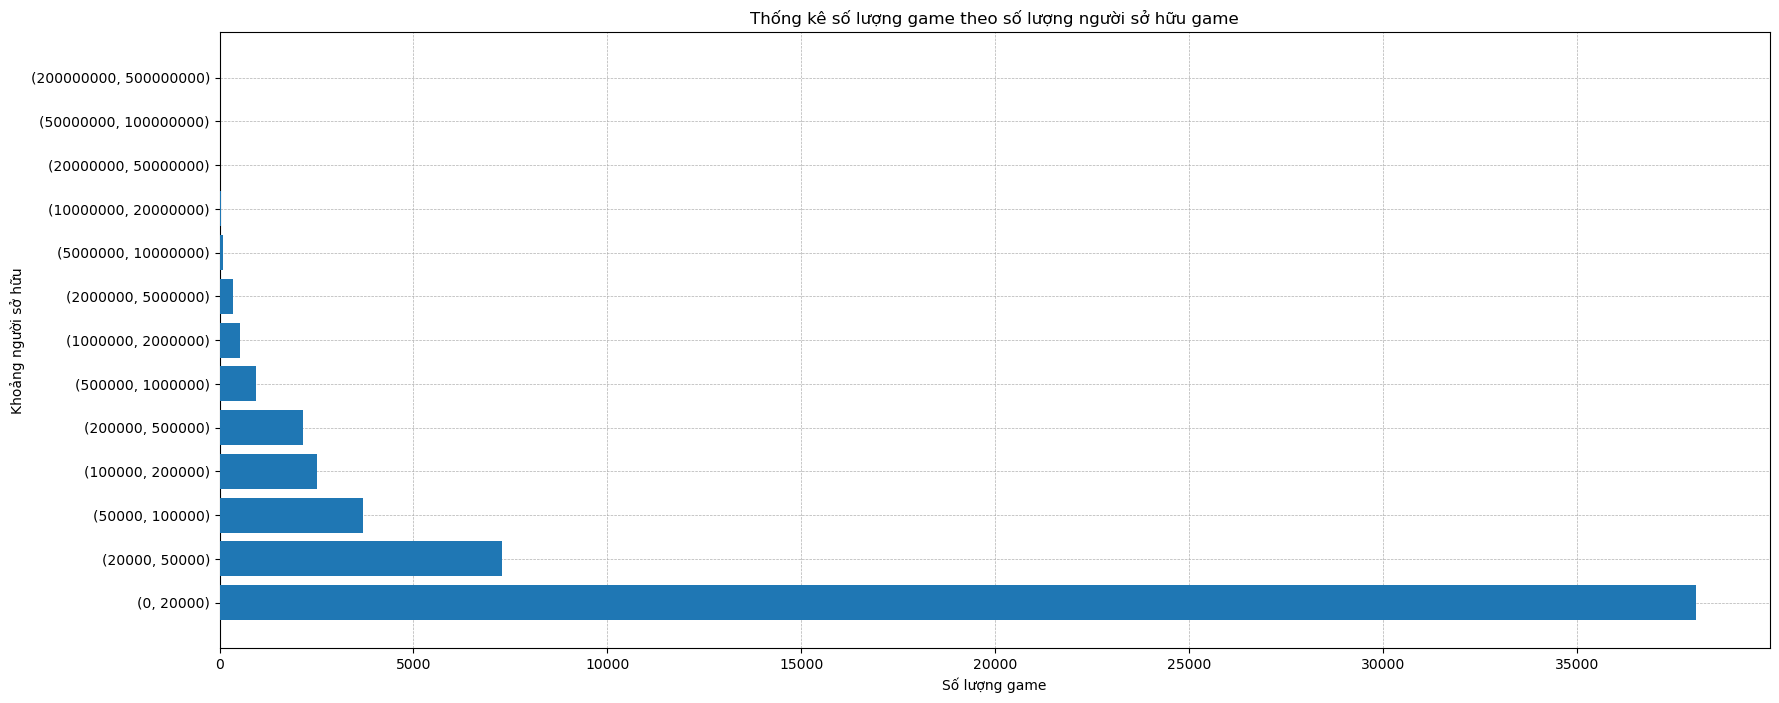

In [36]:

fig =plt.subplots(figsize=(20,8))

owner=np.array(owners_game.keys())
for i in range(len(owner)):
    owner[i]=str(owner[i])
num_game=np.array(owners_game.values)
plt.barh(owner,num_game,zorder=3)
plt.xlabel('Số lượng game')
plt.ylabel('Khoảng người sở hữu')
plt.title('Thống kê số lượng game theo số lượng người sở hữu game')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

<h4>Nhận xét:</h4>

- Các game với số lượng người chơi ít *(0,20000)* chiếm xấp xỉ 70% tất các các game trong danh sách game.
- Tỉ lệ nghịch giữa số lượng người chơi game với số lượng game: game càng có nhiều người sở hữu thì số lượng của game đó ít và ngược lại

<h3>Bước 3: Xét game có số lượng người sở hữu (0,20000) </h3>

In [37]:
low_owner=steam_df[steam_df.Owners==(0, 20000)]

<h5>Tính các thông số thống kê

In [38]:
def q1(x):
    return x.quantile(0.25)
def interval_zone(col):
    return tuple(np.round([col.mean()-3*col.std(),col.mean()+3*col.std()],1))
def mode(col):
    return pd.Series.mode(col)[0]
# 90th Percentile
def q3(x):
    return x.quantile(0.75)
info_price=low_owner.Price.agg(['min','max','mean',mode,'median','std', q1,q3,interval_zone])
info_price

min                              0
max                          99900
mean                    709.759351
mode                           499
median                       499.0
std                    1092.846986
q1                           199.0
q3                           999.0
interval_zone    (-2568.8, 3988.3)
Name: Price, dtype: object

<h4>Nhận xét:</h4>

- 99% dữ liệu phân bố trong khoảng (-1432.2,3988.3), mà giá tiền không âm, nên khoảng phân bố 99% dữ liệu được hiểu là trong khoảng (0,3988.3) USD.
- Dữ liệu lệch phải (mean>median, mean>mode và mode=median)
- Ta thấy dữ liệu có độ lệch chuẩn hơn 1000, nên có thể đoán dự đoán được, dữ liệu bị nhiễu (do max=99900, gấp 99 lần độ lệch chuẩn)

<h5>Xử lý và vẽ biểu đồ:</h5>

- Độ nhiễu lớn, nên chỉ thực hiện vẽ trong khoảng phân bố 95% dữ liệu để tiện cho việc quan sát.

Lấy khoảng giá trị trên cho dữ liệu

In [39]:
upper_interval=int(info_price.iloc[8][1])
upper_interval

3988

In [40]:
low_owner_plot=low_owner[low_owner.Price<=upper_interval]

Tính số lượng game theo giá tiền

In [41]:
price_low_owner=low_owner_plot.Price.value_counts().sort_index()
display(price_low_owner)

0       4011
28        16
29         7
31         6
37        16
        ... 
3499      73
3595       1
3599       1
3749       1
3900       1
Name: Price, Length: 281, dtype: int64

Vẽ biểu đồ đường 

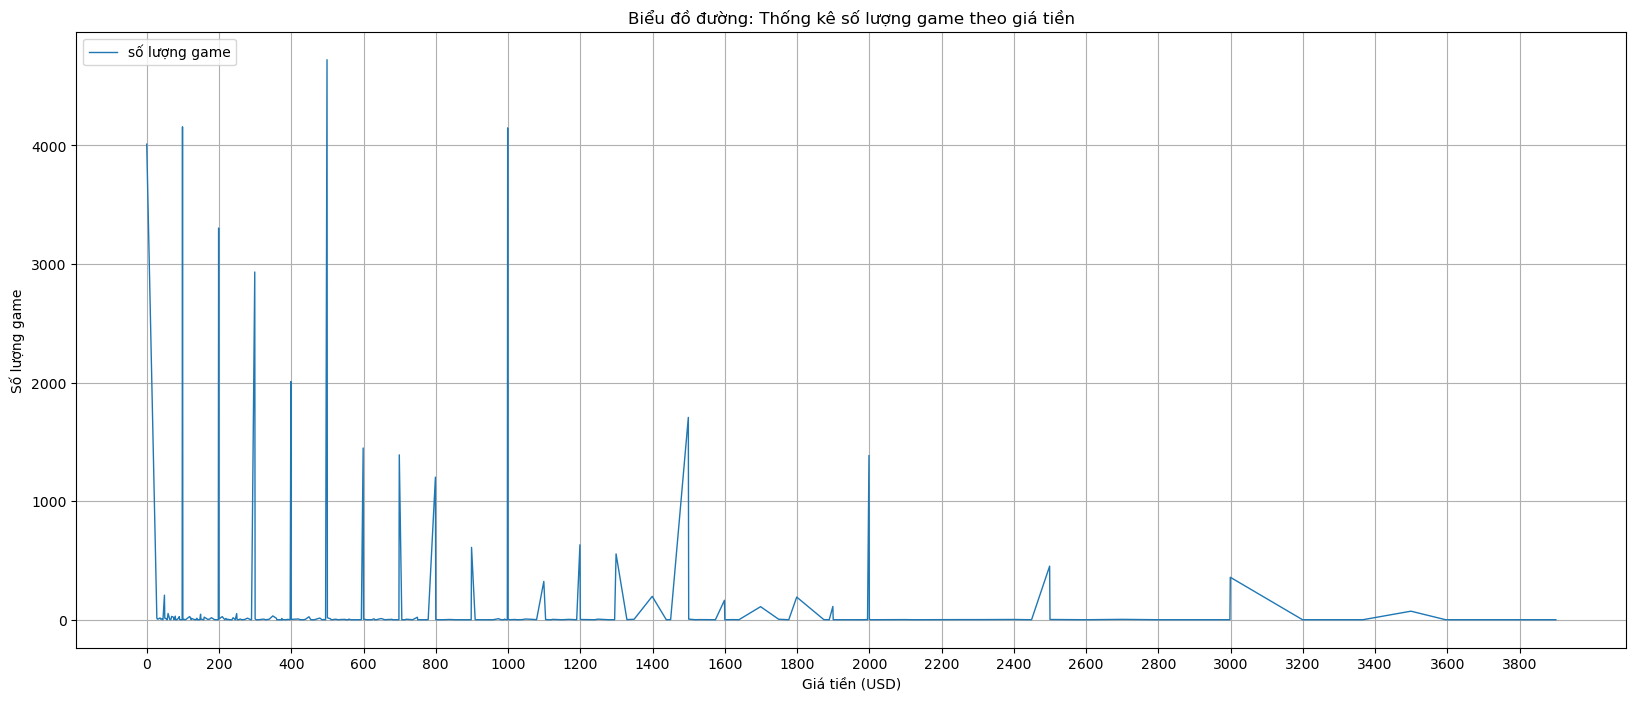

In [42]:
fig =plt.subplots(figsize=(20,8))

price=np.array(price_low_owner.keys())
num_game=np.array(price_low_owner.values)

plt.plot(price,num_game,linestyle='-',linewidth=1,label='số lượng game')
plt.xlabel('Giá tiền (USD)')
plt.ylabel('Số lượng game')
plt.title('Biểu đồ đường: Thống kê số lượng game theo giá tiền')
plt.legend(loc='upper left')
plt.xticks(range(0,price[-1],200))
plt.grid(True)
plt.show()

Vẽ biểu đồ histogram

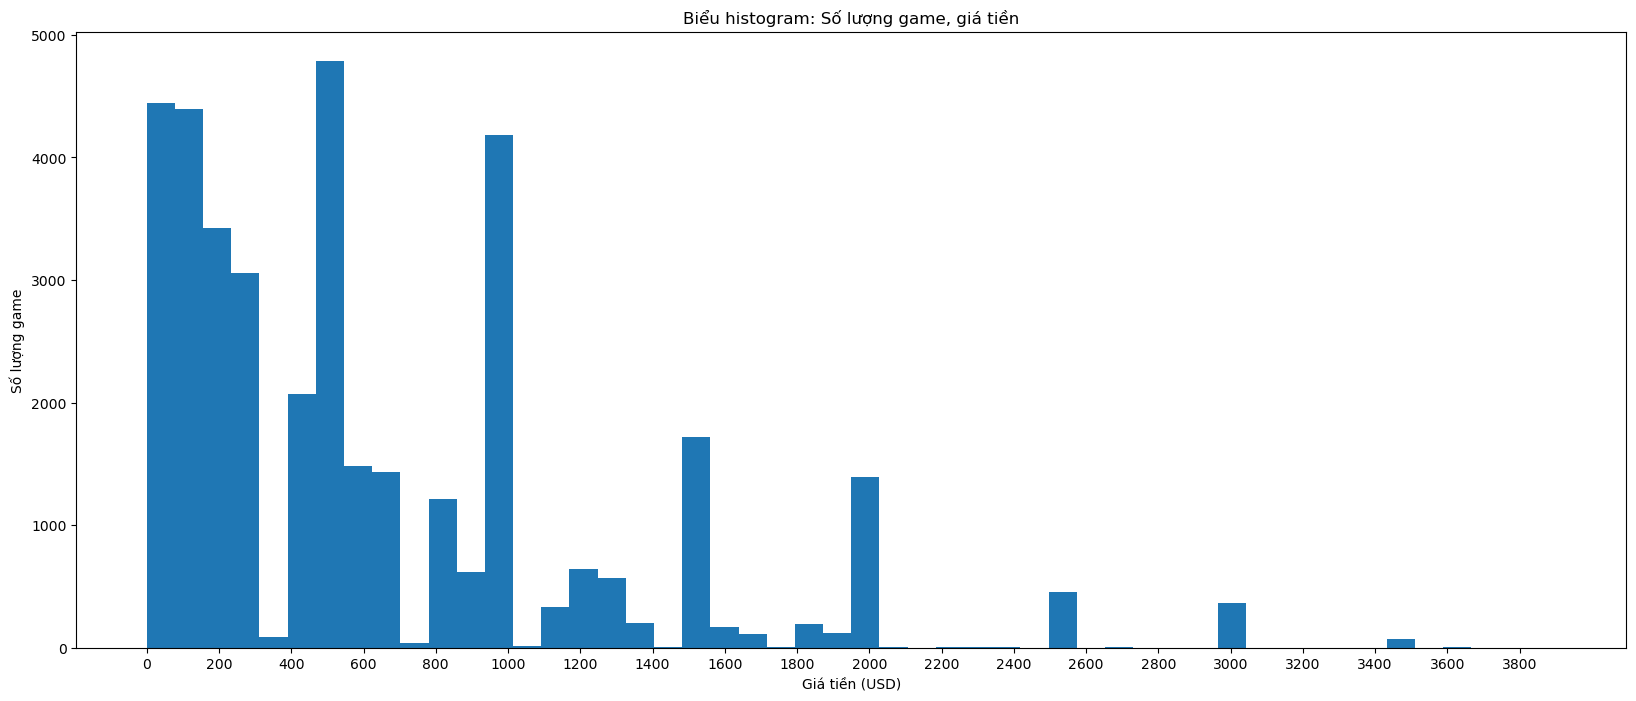

In [43]:
fig =plt.subplots(figsize=(20,8))

plt.hist(low_owner_plot.Price,bins=50)
plt.xlabel('Giá tiền (USD)')
plt.ylabel('Số lượng game')
plt.title('Biểu histogram: Số lượng game, giá tiền')
plt.xticks(range(0,price[-1],200))
plt.show()

Chúng ta thử với biểu đồ hộp nhé

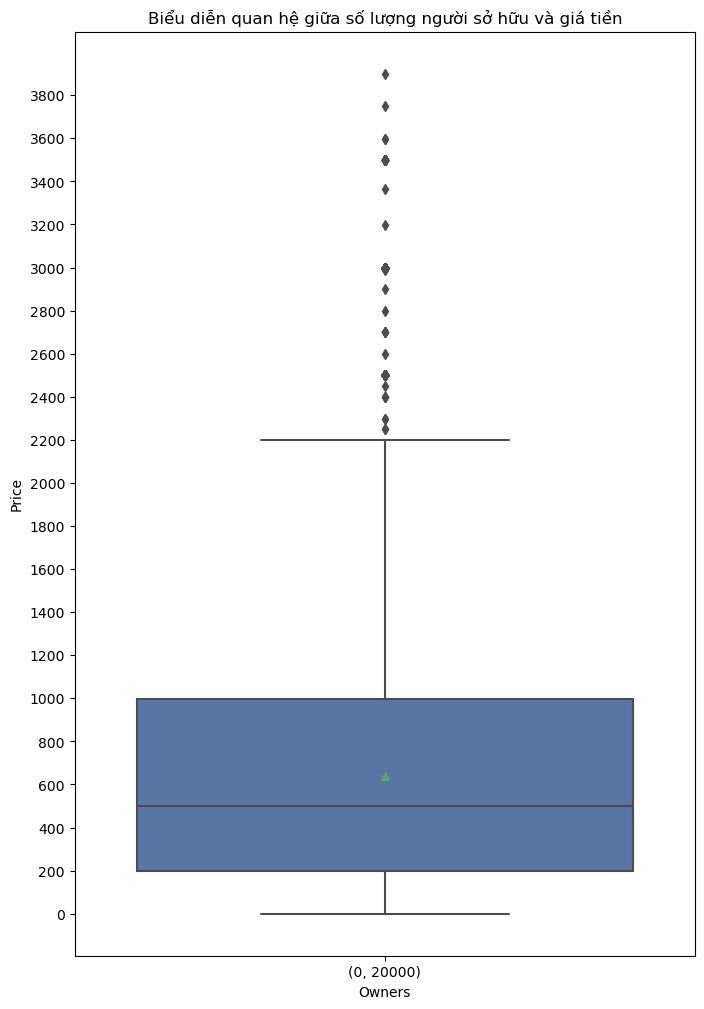

In [44]:
fig =plt.subplots(figsize=(8,12))

y_range=range(0,int(upper_interval),200)
sns.set()
sns.boxplot(x='Owners',y='Price',data=low_owner_plot,showmeans=True,width=0.8)

plt.yticks(y_range)
plt.title('Biểu diễn quan hệ giữa số lượng người sở hữu và giá tiền')
plt.show()


<h4>Nhận xét:</h4>

- Biểu đồ đường, histogram:
    - Ta thấy các game sẽ có giá tiền ở một số mức cố định như: 0, 99, 199, 399, 499,... Nhưng không làm tròn lên thành các mức giá chia hết cho 100 để đánh vào [tâm lý người mua](https://khoahoc.tv/tai-sao-gia-san-pham-thuong-duoc-niem-yet-thanh-so-le-106021#:~:text=Khuy%E1%BA%BFn%20m%C3%A3i%20gi%E1%BA%A3m%20gi%C3%A1%20l%C3%A0,ngh%C3%ACn%20v%E1%BA%ADy%20nh%C6%B0ng%20th%E1%BB%B1c%20ra)
    - Giá tiền mua game tập trung dưới 1000USD.
- Biểu đồ hộp:
    - 75% số game được mua ở giá 0-1000USD. Trong đó 25% số lượng game được mua ở mức giá dưới 200 USD và 50% số game mua ở giá nằm trong đoạn [200,1000].

<h3>Bước 3: So sánh trên toàn bộ khoảng người sở hữu</h3>

In [45]:

info_price_all=steam_df.groupby('Owners')['Price'].agg(['min','max','mean',mode,'median','std', q1,q3,interval_zone])
info_price_all

,min,max,mean,mode,median,std,q1,q3,interval_zone
Owners,,,,,,,,,
"(0, 20000)",0,99900,709.759351,499,499,1092.846986,199.0,999.00,"(-2568.8, 3988.3)"
"(20000, 50000)",0,7999,730.084420,0,499,874.168849,99.0,999.00,"(-1892.4, 3352.6)"
"(50000, 100000)",0,9499,834.047632,0,499,970.244935,99.0,1199.00,"(-2076.7, 3744.8)"
"(100000, 200000)",0,9999,932.903930,0,599,1044.216532,99.0,1499.00,"(-2199.7, 4065.6)"
"(200000, 500000)",0,14900,1066.166050,0,699,1223.657662,99.0,1499.00,"(-2604.8, 4737.1)"
"(500000, 1000000)",0,6999,1392.654877,0,999,1373.168978,99.0,1999.00,"(-2726.9, 5512.2)"
"(1000000, 2000000)",0,5999,1578.197719,0,1499,1483.634568,0.0,1999.00,"(-2872.7, 6029.1)"
"(2000000, 5000000)",0,6999,1813.373134,0,1499,1729.101908,49.5,2749.00,"(-3373.9, 7000.7)"
"(5000000, 10000000)",0,9999,1826.061856,0,1249,2044.359123,0.0,2999.00,"(-4307.0, 7959.1)"


Ta thấy khoảng phân bố 95% của lượng người sở hữu game trong khoảng **(5000000, 10000000)** là lớn nhất, nên ta sẽ lấy dữ liệu trong khoảng này để so sánh tổng thể giữa các lượng người sở hữu khác.

Lấy khoảng giá trị trên của dữ liệu

In [46]:
upper_interval_all=int(info_price_all.iloc[8][8][1])
upper_interval_all

7959

In [47]:
owner_plot=steam_df[steam_df.Price<=upper_interval_all].sort_values('Owners')
owner_plot.head()

,App ID,Name,Short Description,Developer,Publisher,Genre,Tags,Type,Categories,Owners,...,Price,Initial Price,Discount,CCU,Languages,Platforms,Release Date,Required Age,Website,Header Image
55690,999990,Bouncing Hero,Bouncing Hero is an extreme auto-jump platform...,zpink;zniq.co,psychoflux entertainment,"Action,Casual,Indie","Action: 42, Casual: 41, Indie: 41, Platformer:...",game,"Single-player,Steam Achievements,Steam Cloud","(0, 20000)",...,499,499,0,0,"English,Japanese,Korean",windows,2019-09-01,3,http://www.bouncinghero.com/,https://cdn.akamai.steamstatic.com/steam/apps/...
32996,374120,Fork Truck Challenge,Fork Truck Challenge is a game about moving ca...,mint arcadeltd.;,mint arcadeltd.;,"Indie,Simulation,Early Access","Automobile Sim: 26, Early Access: 21, Simulati...",game,"Multi-player,Single-player,Co-op,Partial Contr...","(0, 20000)",...,799,799,0,0,"English,French,Italian,German,Spanish,Arabic,B...",windows,2015-07-24,3,http://mintarcade.com,https://cdn.akamai.steamstatic.com/steam/apps/...
32997,374150,Concealed Intent,Concealed Intent is a simultaneous turn-based ...,jarrah technology,jarrah technology,"Indie,Simulation,Strategy","Strategy: 33, Indie: 32, Simulation: 30, Space...",game,"Multi-player,Single-player,Steam Achievements,...","(0, 20000)",...,1499,1499,0,0,English,"windows,mac,linux",2016-08-02,3,http://www.concealedintent.com,https://cdn.akamai.steamstatic.com/steam/apps/...
32998,374170,Sniper Tactical,Sniper Tactical is a casual game. Disguised as...,fragout studio,blackfoot studios,"Action,Casual,Indie,Early Access","Early Access: 22, Action: 21, Casual: 21, Indi...",game,"Single-player,Steam Achievements,Steam Leaderb...","(0, 20000)",...,0,0,0,0,English,windows,2016-01-08,3,http://snipertactical.eu,https://cdn.akamai.steamstatic.com/steam/apps/...
55094,981660,The Detective Chapters: Part One,Your choices matter in this story-rich narrati...,mayhem games usa,mayhem games usa,"Adventure,Simulation","Nudity: 44, Gore: 43, Adventure: 42, Simulatio...",game,Single-player,"(0, 20000)",...,899,899,0,0,English,windows,2021-01-21,3,http://mayhemgamesusa.com,https://cdn.akamai.steamstatic.com/steam/apps/...


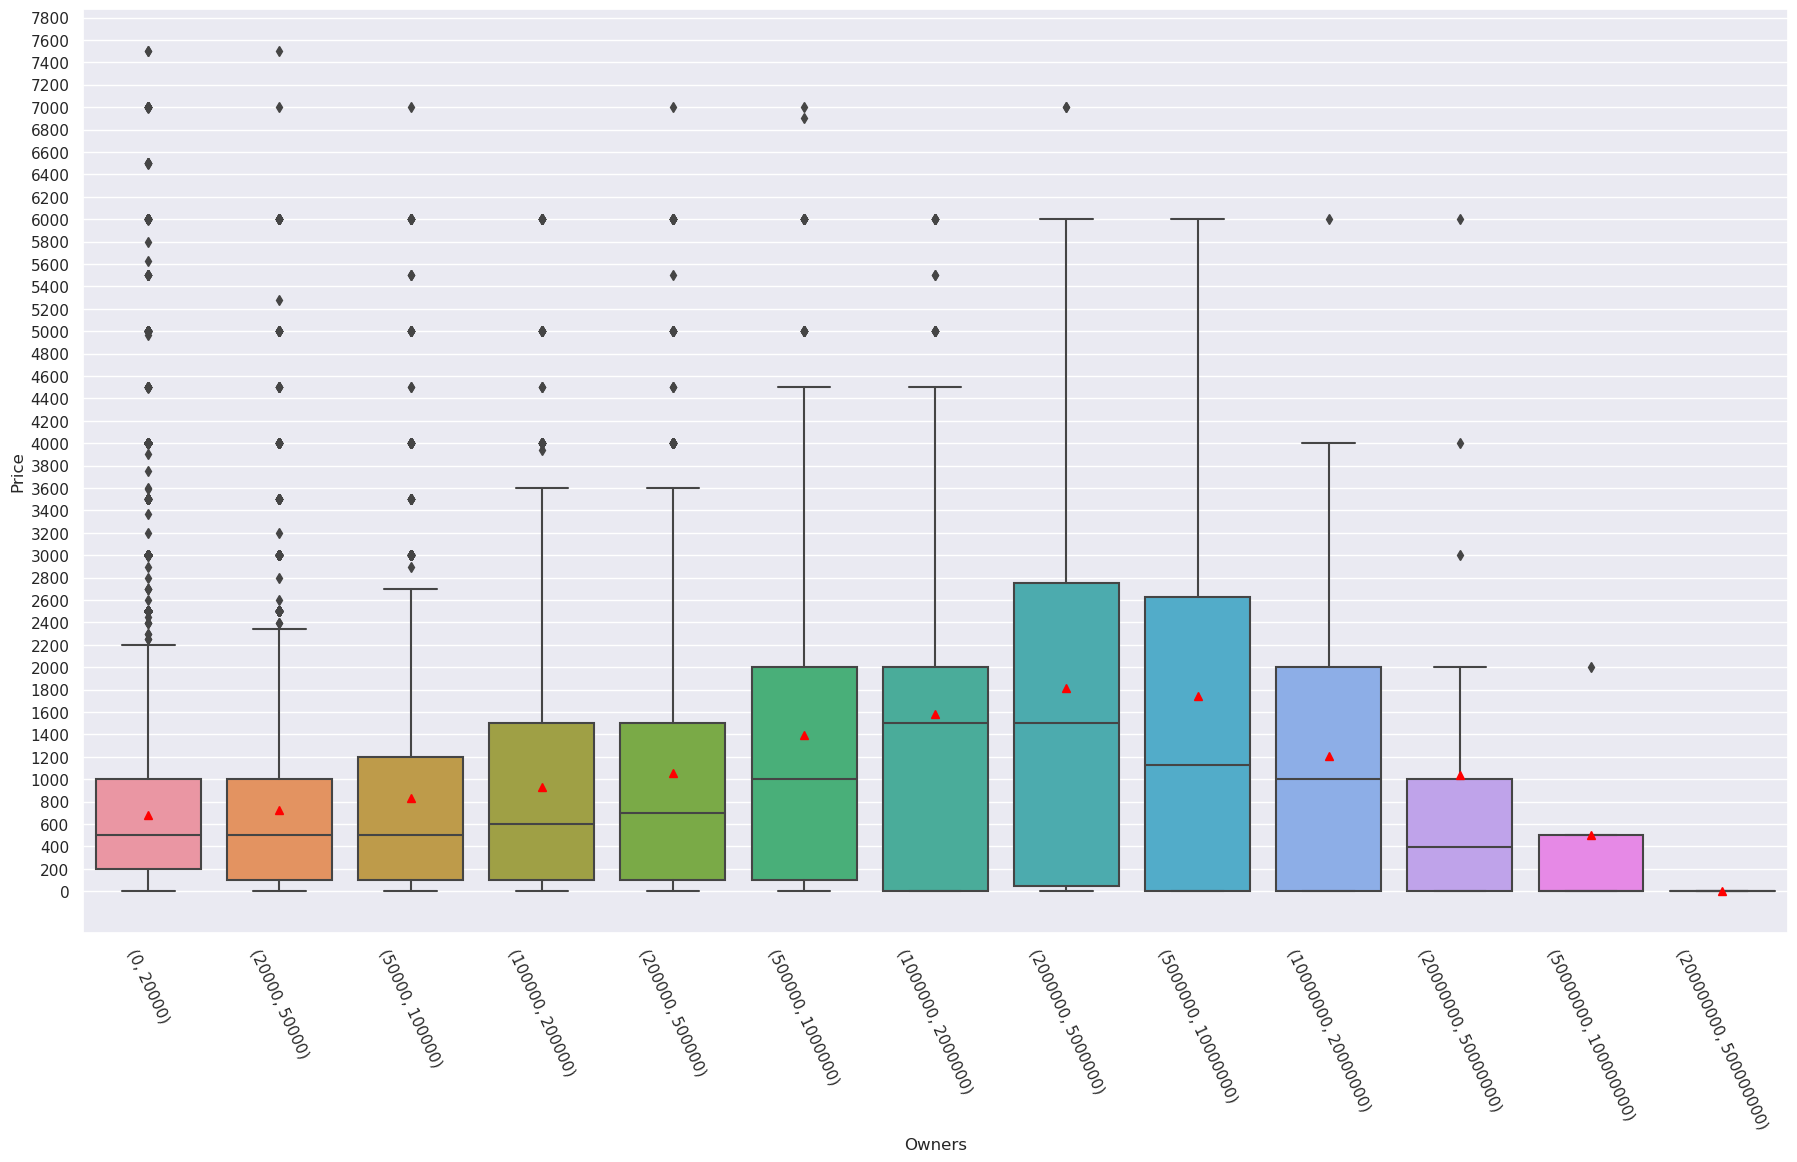

In [48]:
fig=plt.subplots(figsize=(22,12))

y_range=range(0,upper_interval_all,200)

sns.boxplot(x='Owners',y='Price',data=owner_plot,width=0.8,showmeans=True,meanprops={'markerfacecolor':'red',"markeredgecolor":'red'})
plt.yticks(y_range)
plt.setp(plt.gca().get_xticklabels(), rotation=-65, horizontalalignment='center')
plt.show()

<h4>Nhận xét:</h4>

- Trung bình giá mua tăng dần theo theo số lượng người sở hữu. Nhưng đến 1 khoảng nào đó, giá mua game sẽ giảm dần.
- Giá tiền ở những game có số lượng người người sở hữu (2000000, 5000000) có giá mua game rộng nhất (75% số lượng game mua ở giá dưới 2800USD)
- Ở những khoảng người sở hữu game (1000000-2000000), lớn hơn 5000000: thì có 25% số lượng game là miễn phí 0 USD.

<h3>Bước 4: Nhận xét giá tiền có liên quan điến số lượng người sở hữu không</h3>

In [49]:
owner_price_df=steam_df.loc[:,['Owners','Price']]
owner_price_df

,Owners,Price
0,"(10000000, 20000000)",999
1,"(0, 20000)",999
2,"(200000, 500000)",599
3,"(100000, 200000)",1999
4,"(0, 20000)",199
...,...,...
55686,"(0, 20000)",0
55687,"(0, 20000)",299
55688,"(20000, 50000)",0
55689,"(0, 20000)",499


## Tiền xử lý và phân tích dữ liệu để trả lời cho từng câu hỏi

Studio nào đa dạng về thể loại game nhất?

Mối quan hệ giữa giá bán, giá khởi điểm và số lượng người tải

Thể loại có lượt người tag nhiều nhất. Tương quan giữa lượt tag thể loại của game đó với thể loại chính thức của game (liệu có game nào có một thể loại được nhiều người tag nhưng lại không có trong thể loại chính thức không)